In [1]:
!pip install paddlepaddle paddleocr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 74.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=8e414eadf9094bc1dd6c55ab1ac3b5ac368132ec6495d0893b946377c0033fe6
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a9349

In [7]:
import os
import cv2
import numpy as np
from paddleocr import PaddleOCR
import paddle
import time


print(f"Using GPU: {paddle.is_compiled_with_cuda()}")

ocr = PaddleOCR(use_angle_cls=True, lang='en',use_gpu = True)



input_video_path = "/content/drive/MyDrive/Colab Notebooks/TensorGo/ocr-videos/OCR-Sample.mp4"
output_video_path = "/content/drive/MyDrive/Colab Notebooks/TensorGo/ocr-videos/OCR-GPU.mp4"


cap = cv2.VideoCapture(input_video_path)


fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Input video FPS: {fps}")
print(f"Video resolution: {width}x{height}")
print(f"Total frames: {frame_count}")


fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

frame_num = 0
accuracies = []
fps_values = []

start_time = time.time()


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break


    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


    result = ocr.ocr(img_rgb)
    total_confidence = 0
    num_words = 0

    if result is not None:
        for line in result:
            if line:
                for word_info in line:
                    text = word_info[-1][0]
                    confidence = word_info[-1][1]
                    total_confidence += confidence
                    num_words += 1

                    bbox = word_info[0]

                    bbox = [(int(point[0]), int(point[1])) for point in bbox]
                    cv2.polylines(frame, [np.array(bbox)], True, (0, 255, 0), 2)


                    cv2.putText(frame, text, bbox[0], cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    out.write(frame)

    if num_words > 0:
        accuracy = total_confidence / num_words
    else:
        accuracy = 0

    accuracies.append(accuracy)


    frame_num += 1
    elapsed_time = time.time() - start_time
    current_fps = frame_num / elapsed_time
    fps_values.append(current_fps)

    print(f"Processing frame {frame_num}/{frame_count}, Accuracy: {accuracy:.2f}, FPS: {current_fps:.2f}")

end_time = time.time()


total_time = end_time - start_time
average_fps = frame_num / total_time

print(f"Total time taken for processing: {total_time:.2f} seconds")
print(f"Average FPS during processing: {average_fps:.2f}")


cap.release()
out.release()


print("Video processing completed and saved to", output_video_path)


Using GPU: False
[2024/12/02 01:05:21] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:


import os
import cv2
import numpy as np
from paddleocr import PaddleOCR
import paddle
import time


print(f"Using GPU: {paddle.is_compiled_with_cuda()}")  # This will still show if the system supports GPU, but we won't use it

# Initialize PaddleOCR with CPU (use_gpu=False)
ocr = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=False)

# Video input/output paths
input_video_path = "/content/drive/MyDrive/Colab Notebooks/TensorGo/ocr-videos/OCR-Sample.mp4"
output_video_path = "/content/drive/MyDrive/Colab Notebooks/TensorGo/ocr-videos/OCR-CPU-output.mp4"

# Capture video from file
cap = cv2.VideoCapture(input_video_path)

# Get video properties (FPS, width, height, frame count)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Input video FPS: {fps}")
print(f"Video resolution: {width}x{height}")
print(f"Total frames: {frame_count}")

# Define codec and create VideoWriter object for output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Variables for tracking frame number, accuracies, and FPS
frame_num = 0
accuracies = []
fps_values = []

start_time = time.time()

# Process each frame of the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert BGR frame to RGB for PaddleOCR
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run OCR on the current frame (CPU version)
    result = ocr.ocr(img_rgb)
    total_confidence = 0
    num_words = 0

    if result is not None:
        for line in result:
            if line:
                for word_info in line:
                    text = word_info[-1][0]  # Extract detected text
                    confidence = word_info[-1][1]  # Extract confidence score
                    total_confidence += confidence
                    num_words += 1

                    bbox = word_info[0]

                    # Convert bbox points to integer and draw them on the frame
                    bbox = [(int(point[0]), int(point[1])) for point in bbox]
                    cv2.polylines(frame, [np.array(bbox)], True, (0, 255, 0), 2)

                    # Put the detected text on the frame
                    cv2.putText(frame, text, bbox[0], cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Write processed frame to output video
    out.write(frame)

    # Calculate average accuracy for this frame
    if num_words > 0:
        accuracy = total_confidence / num_words
    else:
        accuracy = 0

    accuracies.append(accuracy)

    # Track frame number and calculate FPS
    frame_num += 1
    elapsed_time = time.time() - start_time
    current_fps = frame_num / elapsed_time
    fps_values.append(current_fps)

    # Print progress
    print(f"Processing frame {frame_num}/{frame_count}, Accuracy: {accuracy:.2f}, FPS: {current_fps:.2f}")

end_time = time.time()

# Calculate total time and average FPS
total_time = end_time - start_time
average_fps = frame_num / total_time

print(f"Total time taken for processing: {total_time:.2f} seconds")
print(f"Average FPS during processing: {average_fps:.2f}")

# Release resources
cap.release()
out.release()


print("Video processing completed and saved to", output_video_path)

Using GPU: False
[2024/12/02 00:49:52] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text

[2024/12/02 01:40:24] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

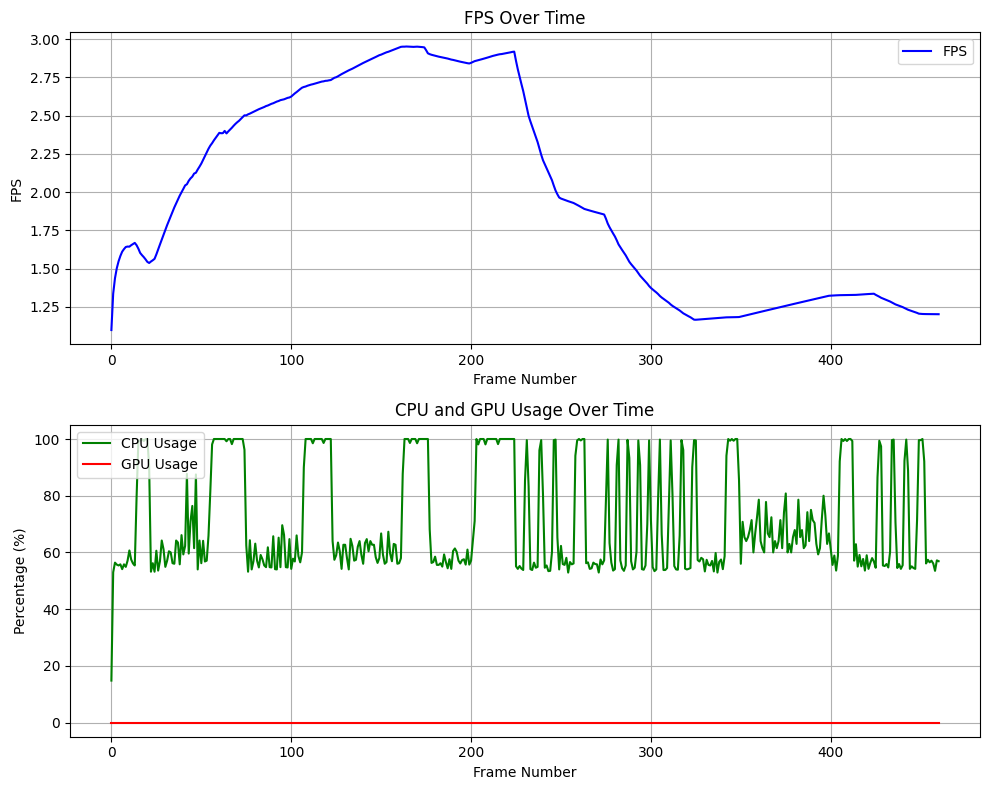

[2024/12/02 01:46:52] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.17109942436218262
[2024/12/02 01:46:52] ppocr DEBUG: cls num  : 10, elapsed : 0.08002591133117676
[2024/12/02 01:46:52] ppocr DEBUG: rec_res num  : 10, elapsed : 0.5733368396759033
Processing frame 1/461, Accuracy: 0.96, FPS: 1.17, CPU: 63.90%, GPU: 0.00%
[2024/12/02 01:46:52] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.12468266487121582
[2024/12/02 01:46:52] ppocr DEBUG: cls num  : 10, elapsed : 0.029542207717895508
[2024/12/02 01:46:53] ppocr DEBUG: rec_res num  : 10, elapsed : 0.4393959045410156
Processing frame 2/461, Accuracy: 0.96, FPS: 1.37, CPU: 54.10%, GPU: 0.00%
[2024/12/02 01:46:53] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.12265229225158691
[2024/12/02 01:46:53] ppocr DEBUG: cls num  : 10, elapsed : 0.03162741661071777
[2024/12/02 01:46:53] ppocr DEBUG: rec_res num  : 10, elapsed : 0.5055241584777832
Processing frame 3/461, Accuracy: 0.96, FPS: 1.40, CPU: 59.00%, GPU: 0.00%
[2024/12/02 01:46:54] ppocr DEBUG

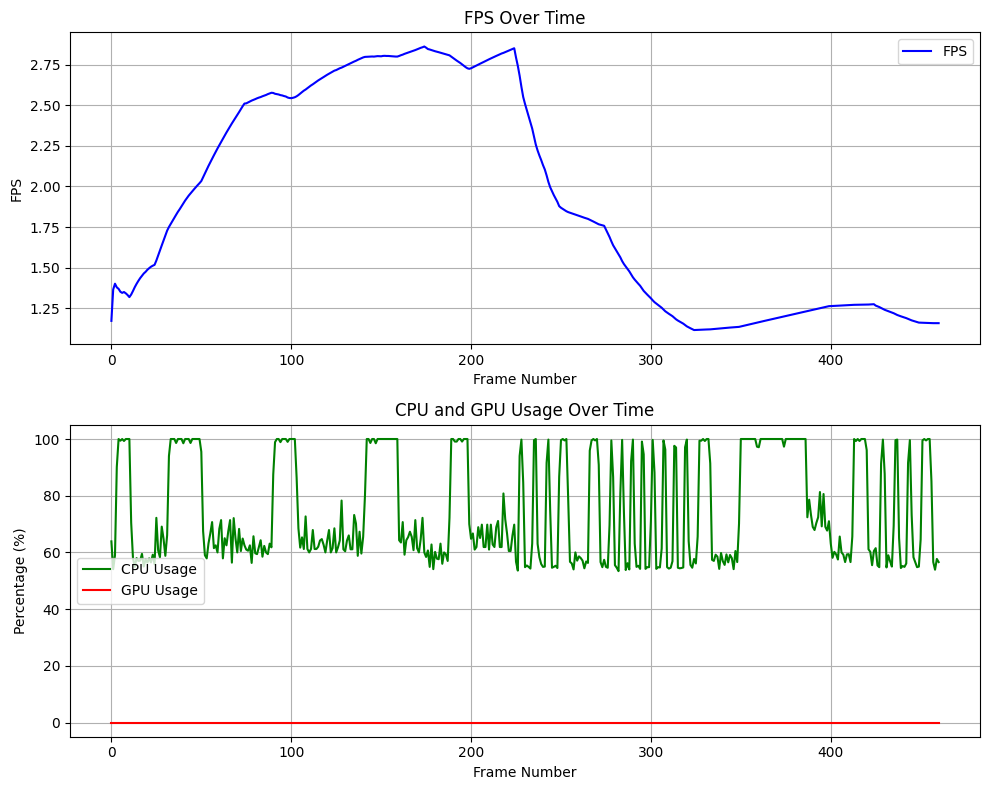

In [10]:
import os
import cv2
import numpy as np
from paddleocr import PaddleOCR
import paddle
import time
import psutil  # For CPU monitoring
import matplotlib.pyplot as plt  # For plotting the graphs
import tensorflow as tf  # If using TensorFlow for GPU monitoring


# Function to monitor CPU usage
def get_cpu_usage():
    return psutil.cpu_percent(interval=None)

# Function to monitor GPU usage (specifically for T4 GPU)
def get_gpu_usage():
    if paddle.is_compiled_with_cuda():
        gpu_info = tf.config.experimental.get_memory_info('GPU:0')
        return gpu_info['current'] / gpu_info['total'] * 100
    return 0.0  # Return 0% if no GPU is available


# Function to calculate FPS
def calculate_fps(start_time, end_time, frame_count):
    return frame_count / (end_time - start_time)


# Function to evaluate the model
def evaluate_model(ocr_model, input_video_path, output_video_path, use_gpu=False):
    # Initialize video capture and writer
    cap = cv2.VideoCapture(input_video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    frame_num = 0
    accuracies = []
    fps_values = []
    cpu_usages = []
    gpu_usages = []

    total_start_time = time.time()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Run OCR
        result = ocr_model.ocr(img_rgb)

        total_confidence = 0
        num_words = 0

        if result is not None:
            for line in result:
                if line:
                    for word_info in line:
                        text = word_info[-1][0]
                        confidence = word_info[-1][1]
                        total_confidence += confidence
                        num_words += 1

                        bbox = word_info[0]
                        bbox = [(int(point[0]), int(point[1])) for point in bbox]
                        cv2.polylines(frame, [np.array(bbox)], True, (0, 255, 0), 2)
                        cv2.putText(frame, text, bbox[0], cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

        out.write(frame)

        if num_words > 0:
            accuracy = total_confidence / num_words
        else:
            accuracy = 0

        accuracies.append(accuracy)

        # Track frame number and calculate FPS
        frame_num += 1
        elapsed_time = time.time() - total_start_time
        current_fps = frame_num / elapsed_time
        fps_values.append(current_fps)

        # Monitor CPU and GPU usage
        cpu_usage = get_cpu_usage()
        gpu_usage = get_gpu_usage()

        cpu_usages.append(cpu_usage)
        gpu_usages.append(gpu_usage)

        # Print progress
        print(f"Processing frame {frame_num}/{frame_count}, Accuracy: {accuracy:.2f}, FPS: {current_fps:.2f}, CPU: {cpu_usage:.2f}%, GPU: {gpu_usage:.2f}%")

    total_end_time = time.time()
    total_time = total_end_time - total_start_time
    average_fps = calculate_fps(total_start_time, total_end_time, frame_num)

    print(f"Total time taken for processing: {total_time:.2f} seconds")
    print(f"Average FPS during processing: {average_fps:.2f}")

    # Release resources
    cap.release()
    out.release()


    print("Video processing completed and saved to", output_video_path)

    # Plot the performance metrics
    plot_metrics(fps_values, accuracies, cpu_usages, gpu_usages)


def plot_metrics(fps_values, accuracies, cpu_usages, gpu_usages):
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    # Plot FPS vs Frame
    axes[0].plot(fps_values, label='FPS', color='blue')
    axes[0].set_title('FPS Over Time')
    axes[0].set_xlabel('Frame Number')
    axes[0].set_ylabel('FPS')
    axes[0].grid(True)
    axes[0].legend()

    # Plot CPU and GPU usage
    axes[1].plot(cpu_usages, label='CPU Usage', color='green')
    axes[1].plot(gpu_usages, label='GPU Usage', color='red')
    axes[1].set_title('CPU and GPU Usage Over Time')
    axes[1].set_xlabel('Frame Number')
    axes[1].set_ylabel('Percentage (%)')
    axes[1].grid(True)
    axes[1].legend()

    plt.tight_layout()
    plt.show()


# Initialize PaddleOCR with GPU or CPU based on your setup
ocr_gpu = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=True)
ocr_cpu = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=False)

# Video paths
input_video_path = "/content/drive/MyDrive/Colab Notebooks/TensorGo/ocr-videos/OCR-Sample.mp4"
output_video_gpu_path = "/content/drive/MyDrive/Colab Notebooks/TensorGo/ocr-videos/OCR-GPU.mp4"
output_video_cpu_path = "/content/drive/MyDrive/Colab Notebooks/TensorGo/ocr-videos/OCR-CPU-output.mp4"

# Evaluate models and track performance for both GPU and CPU
evaluate_model(ocr_gpu, input_video_path, output_video_gpu_path, use_gpu=True)  # GPU Version
evaluate_model(ocr_cpu, input_video_path, output_video_cpu_path, use_gpu=False)  # CPU Version
